In [20]:
# Importing Libraries
import pandas as pd
import numpy as np
np.set_printoptions(suppress=True)

import matplotlib.pyplot as plt
import seaborn as sns
import datetime

from sklearn.preprocessing import LabelEncoder

pd.set_option('display.max_columns', None)

In [21]:
# Importing the data
df = pd.read_csv("C:\\Users\\SarahZOUININA\\Documents\\GitHub\\Sberbank_Russian_Housing_Market_Pro\\data\\train.csv")#df['price_doc'] = np.log1p(df['price_doc'])
#test = pd.read_csv(r"C:\Users\Sarah\PycharmProjects\Sberbank_Russian_Housing_Market\data_sberbank\test.csv")

# Seeding for reproductibility
np.random.seed(0) 

In [22]:
df.columns[:25]

Index(['id', 'timestamp', 'full_sq', 'life_sq', 'floor', 'max_floor',
       'material', 'build_year', 'num_room', 'kitch_sq', 'state',
       'product_type', 'sub_area', 'area_m', 'raion_popul', 'green_zone_part',
       'indust_part', 'children_preschool', 'preschool_quota',
       'preschool_education_centers_raion', 'children_school', 'school_quota',
       'school_education_centers_raion',
       'school_education_centers_top_20_raion', 'hospital_beds_raion'],
      dtype='object')

## Checking for binary variables

'product_type', 'culture_objects_top_25', 'thermal_power_plant_raion', 'incineration_raion', 
'oil_chemistry_raion','radiation_raion', 'railroad_terminal_raion', 'big_market_raion', 
'nuclear_reactor_raion', 'detention_facility_raion', 'water_1line', 'big_road1_1line',
'railroad_1line'


In [23]:
binary_variables = ['product_type', 'culture_objects_top_25', 'thermal_power_plant_raion', 'incineration_raion', 
                    'oil_chemistry_raion','radiation_raion', 'railroad_terminal_raion', 'big_market_raion', 
                    'nuclear_reactor_raion', 'detention_facility_raion', 'water_1line', 'big_road1_1line',
                    'railroad_1line']
df.product_type.unique()
df.culture_objects_top_25.unique()
df.thermal_power_plant_raion.unique()

array(['no', 'yes'], dtype=object)

In [24]:
 "water_1line", "big_road1_1line", "railroad_1line"

('water_1line', 'big_road1_1line', 'railroad_1line')

## Checking for Outliers

* build_year, full_sq, life_sq, kitchen_sq
* Create a new variable showing the percentage_living_area


In [25]:
df['material'].value_counts()

1.0    14197
2.0     2993
5.0     1561
4.0     1344
6.0      803
3.0        1
Name: material, dtype: int64

In [26]:
df.groupby(df['material'], as_index=False)['price_doc'].mean()
# The nearest mean to material = 3 is 6, so we will change it in the RemoveOutliers routine

,material,price_doc
0,1.0,7.088091e+06
1,2.0,8.421237e+06
2,3.0,6.931143e+06
3,4.0,1.018341e+07
4,5.0,6.483122e+06
5,6.0,7.979828e+06


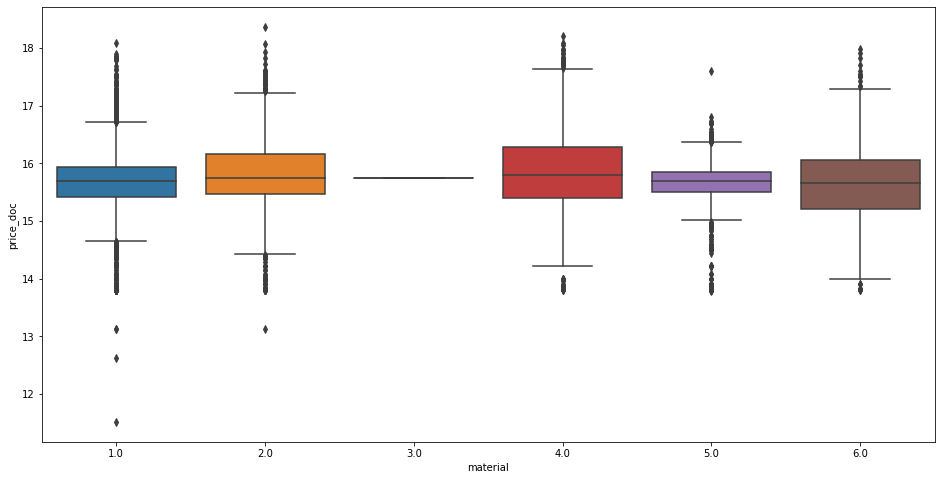

In [27]:
# Average price_doc by material
plt.figure(figsize=(16,8))
sns.boxplot(x = df['material'], y = np.log1p(df['price_doc']), 
            data = df.groupby(df['material'], as_index=False)['price_doc'].mean())
plt.show()

# The nearest mean to material = 3 is 6, so we will change it in the RemoveOutliers routine

In [28]:

def RemoveOutliers(df):
    df["build_year"].loc[df["build_year"] == 215] = 2015
    df["build_year"].loc[df["build_year"] == 71] = 1971
    df["build_year"].loc[df["build_year"] == 4965] = 1965
    df["build_year"].loc[df["build_year"] == 20] = 2000
    df["build_year"].loc[df["build_year"] == 20052009] = 2009
    df["build_year"].loc[(df["build_year"] > 3000) | (df["build_year"] < 1700)] = np.nan
    df['full_sq'].loc[df['full_sq']==5326] = 532.6
    df['full_sq'].loc[df['full_sq']==1] = 0
    df['life_sq'].loc[df['life_sq']==7478] = 747.8
    df["full_sq"].loc[df["full_sq"] < df["life_sq"]] = df["life_sq"].loc[df["full_sq"] < df["life_sq"]]
    df['kitch_sq'] = df['kitch_sq'].replace([620.,1970.,1974.,2013.,2014.],[62.0,197.0,197.4,201.3,201.4])
    df['material'].iloc[df['material']==3] = 6

    return df

In [29]:
df = RemoveOutliers(df)

C:\Users\SarahZOUININA\Anaconda3\lib\site-packages\pandas\core\indexing.py:1637: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)
C:\Users\SarahZOUININA\Anaconda3\lib\site-packages\pandas\core\indexing.py:1637: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)
C:\Users\SarahZOUININA\Anaconda3\lib\site-packages\pandas\core\indexing.py:1637: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexin

In [30]:
# the real  living area of a property?
def create_new_features(df):
    df["living_area"] = df['full_sq'] - df['life_sq']
    df["percentage_living_area"] = df['life_sq']/df['full_sq']
    df["room_area_average"] = df["living_area"]/df["num_room"]
    df['mean_price_by_room'] = df['price_doc']/df['num_room']
    df['area_by_person'] = df['area_m']/df['raion_popul']
    df['green_area_m'] = df['green_zone_part']*df['area_m']
    df["age_of_property"] = abs(df["sold_year"] - df["build_year"])
    return df

## Year Variables
* The hypothesis: create variables depending on the year chuncks predefined in the dataset
* Binning the year data

In [31]:
# Get year variables
year_features = [feature for feature in df.columns if 'yr' in feature or 'year' in feature or '19' in feature]
year_features

['build_year',
 'build_count_before_1920',
 'build_count_1921-1945',
 'build_count_1946-1970',
 'build_count_1971-1995',
 'build_count_after_1995']

In [32]:
# Creating bins on properties' building period
binInterval = [0, 1920, 1945, 1970, 1995, 2020]
binLabels   = [1, 2, 3,4,5]

df['binned_build_year'] = pd.cut(df['build_year'], bins = binInterval, labels=binLabels)

In [33]:
df['binned_build_year'].value_counts()

5    5815
4    5239
3    4710
2     146
1      55
Name: binned_build_year, dtype: int64

## Time data
* Check the selling year and the selling month to get sale trends

In [34]:
# Dealing with timestamp to get the year sold

df['timestamp'].dtype
df['timestamp_parsed'] = pd.to_datetime(df['timestamp'], format='%Y-%m-%d') # Format 2011-08-20 : %Y-%m-%d

# Creating New features

df['sold_year']=df['timestamp_parsed'].dt.year
df['sold_month']=df['timestamp_parsed'].dt.month
df['sold_day']=df['timestamp_parsed'].dt.day
df['sold_year'].unique()
# Calculating the age of the properties
df["age_of_property"] = abs(df["sold_year"] - df["build_year"])

In [35]:
df = df.drop(['timestamp','timestamp_parsed'], axis=1)

## Building material
* The hypothesis: trying to fill material using the other material features

In [36]:
# Get material variables
material_features = [feature for feature in df.columns if 'build_count_' in feature]
material_features =['raion_build_count_with_material_info','build_count_block','build_count_wood','build_count_frame',
 'build_count_brick','build_count_monolith','build_count_panel','build_count_foam','build_count_slag','build_count_mix']

In [37]:
df[material_features]

,raion_build_count_with_material_info,build_count_block,build_count_wood,build_count_frame,build_count_brick,build_count_monolith,build_count_panel,build_count_foam,build_count_slag,build_count_mix
0,211.0,25.0,0.0,0.0,0.0,2.0,184.0,0.0,0.0,0.0
1,245.0,83.0,1.0,0.0,67.0,4.0,90.0,0.0,0.0,0.0
2,330.0,59.0,0.0,0.0,206.0,4.0,60.0,0.0,1.0,0.0
3,458.0,9.0,51.0,12.0,124.0,50.0,201.0,0.0,9.0,2.0
4,746.0,48.0,0.0,0.0,643.0,16.0,35.0,0.0,3.0,1.0
...,...,...,...,...,...,...,...,...,...,...
30466,282.0,35.0,0.0,0.0,20.0,5.0,222.0,0.0,0.0,0.0
30467,651.0,19.0,27.0,4.0,529.0,25.0,41.0,0.0,5.0,1.0
30468,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
30469,185.0,38.0,0.0,0.0,4.0,9.0,134.0,0.0,0.0,0.0


In [38]:
df_all_material_data = df[['sub_area','build_year','material','build_count_before_1920','build_count_block','build_count_wood','build_count_frame',
 'build_count_brick','build_count_monolith','build_count_panel','build_count_foam','build_count_slag','build_count_mix']]

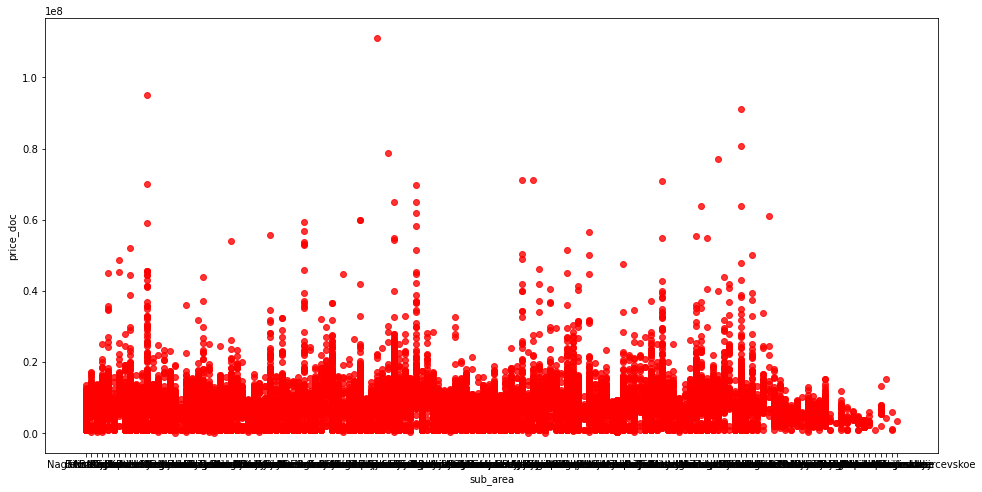

In [39]:
# How the price varies with the sub area?
plt.figure(figsize=(16,8))
sns.regplot(x = df['sub_area'], y = df['price_doc'], data = df[material_features], fit_reg = False, color="red")
plt.show()

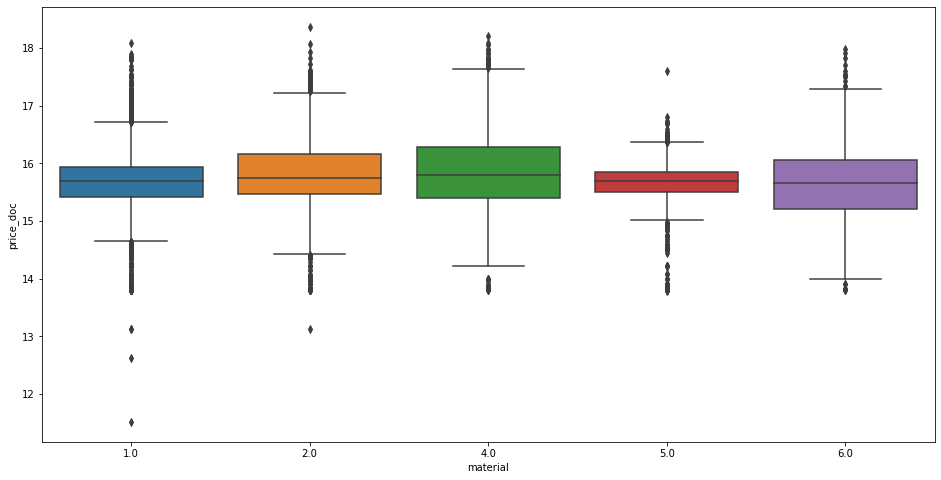

In [40]:
# Does the material affects the price of the property?
plt.figure(figsize=(16,8))
sns.boxplot(x = df['material'], y = np.log1p(df['price_doc']), data = df[material_features])
plt.show()

In [41]:
# Guessing the building material from the age of the property?
df_all_material_data.loc[df_all_material_data['material'] == 4]

,sub_area,build_year,material,build_count_before_1920,build_count_block,build_count_wood,build_count_frame,build_count_brick,build_count_monolith,build_count_panel,build_count_foam,build_count_slag,build_count_mix
8111,Poselenie Vnukovskoe,NaN,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8186,Nekrasovka,2013.0,4.0,0.0,3.0,0.0,0.0,10.0,2.0,28.0,0.0,0.0,0.0
8547,Poselenie Vnukovskoe,NaN,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8574,Horoshevo-Mnevniki,2000.0,4.0,38.0,208.0,99.0,61.0,125.0,49.0,200.0,11.0,1.0,0.0
8665,Nekrasovka,NaN,4.0,0.0,3.0,0.0,0.0,10.0,2.0,28.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
30428,Poselenie Sosenskoe,NaN,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
30442,Poselenie Voskresenskoe,2015.0,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
30444,Mitino,2016.0,4.0,13.0,9.0,51.0,12.0,124.0,50.0,201.0,0.0,9.0,2.0
30459,Solncevo,NaN,4.0,23.0,43.0,352.0,79.0,126.0,16.0,157.0,0.0,23.0,5.0


In [42]:
df.groupby(df['material'], as_index=False)['build_year'].median()

# The question is should we update our bins?

,material,build_year
0,1.0,1987.0
1,2.0,1962.0
2,4.0,2012.0
3,5.0,1969.0
4,6.0,2013.0


In [43]:
# the area and the year build?
df.groupby(df['sub_area'], as_index=False)['build_year'].median()

,sub_area,build_year
0,Ajeroport,1961.0
1,Akademicheskoe,1971.5
2,Alekseevskoe,1965.0
3,Altuf'evskoe,1977.0
4,Arbat,1960.5
...,...,...
141,Vyhino-Zhulebino,1982.0
142,Zamoskvorech'e,1963.0
143,Zapadnoe Degunino,2002.0
144,Zjablikovo,1977.0


In [44]:
df.groupby(df['sub_area'], as_index=False)['price_doc'].median()

,sub_area,price_doc
0,Ajeroport,8400000.0
1,Akademicheskoe,9000000.0
2,Alekseevskoe,7500000.0
3,Altuf'evskoe,5950000.0
4,Arbat,12000000.0
...,...,...
141,Vyhino-Zhulebino,6200000.0
142,Zamoskvorech'e,12750000.0
143,Zapadnoe Degunino,4961130.0
144,Zjablikovo,6650000.0


In [45]:
df.groupby(df['sub_area'], as_index=False)['price_doc'].mean()

,sub_area,price_doc
0,Ajeroport,9.888950e+06
1,Akademicheskoe,1.057576e+07
2,Alekseevskoe,8.978796e+06
3,Altuf'evskoe,5.516202e+06
4,Arbat,1.579480e+07
...,...,...
141,Vyhino-Zhulebino,6.530211e+06
142,Zamoskvorech'e,1.621868e+07
143,Zapadnoe Degunino,5.310923e+06
144,Zjablikovo,6.644780e+06


In [46]:
# the area and the month sold?
df.groupby(df['sub_area'], as_index=False)['sold_month'].median()

,sub_area,sold_month
0,Ajeroport,7.0
1,Akademicheskoe,7.0
2,Alekseevskoe,6.0
3,Altuf'evskoe,6.0
4,Arbat,4.0
...,...,...
141,Vyhino-Zhulebino,6.0
142,Zamoskvorech'e,7.0
143,Zapadnoe Degunino,7.5
144,Zjablikovo,6.0


In [47]:
df.groupby(df['binned_build_year'], as_index=False)['price_doc'].median()
# New houses are cheaper than old houses due to the urbanisation of Russia after WW2

,binned_build_year,price_doc
0,1,13200000
1,2,12795000
2,3,6500000
3,4,7200000
4,5,6900000


In [48]:
#Most of the houses are sold on the second half of the year
table = df.groupby(df['sub_area'], as_index=False)['sold_month'].median()


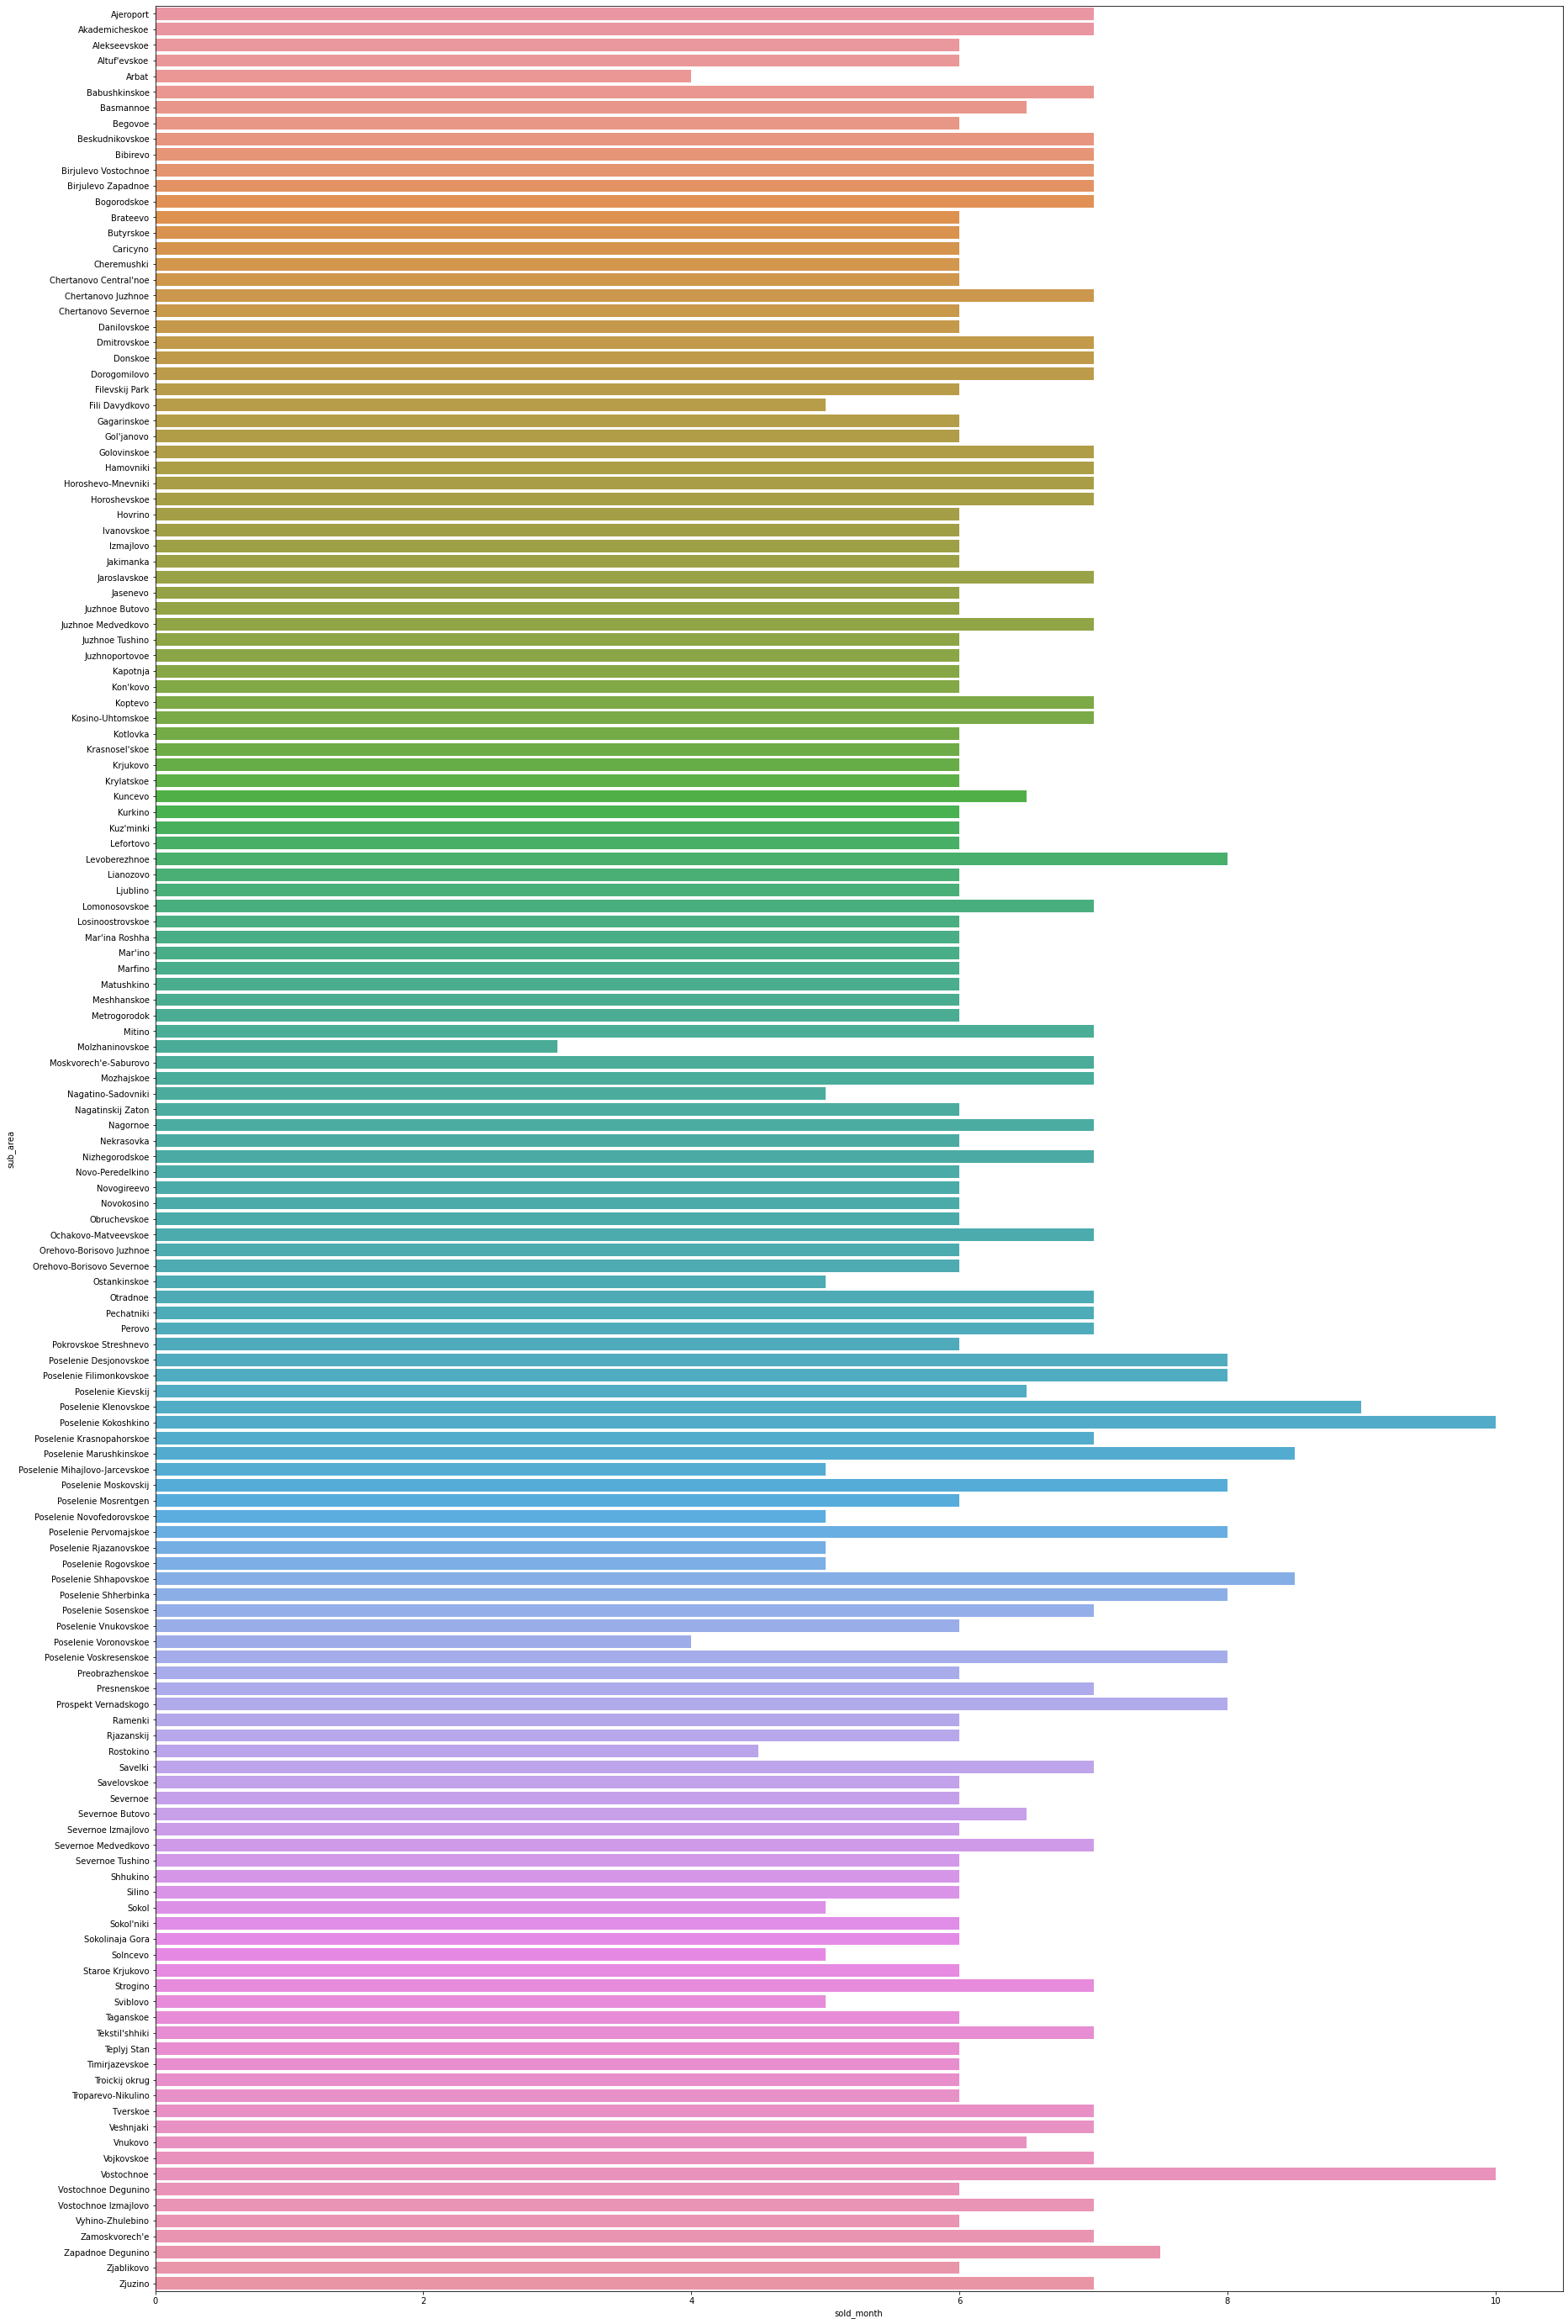

In [49]:
plt.figure(figsize=(30,50))
sns.barplot(x = table['sold_month'], y = table['sub_area'], data = table)
plt.show()

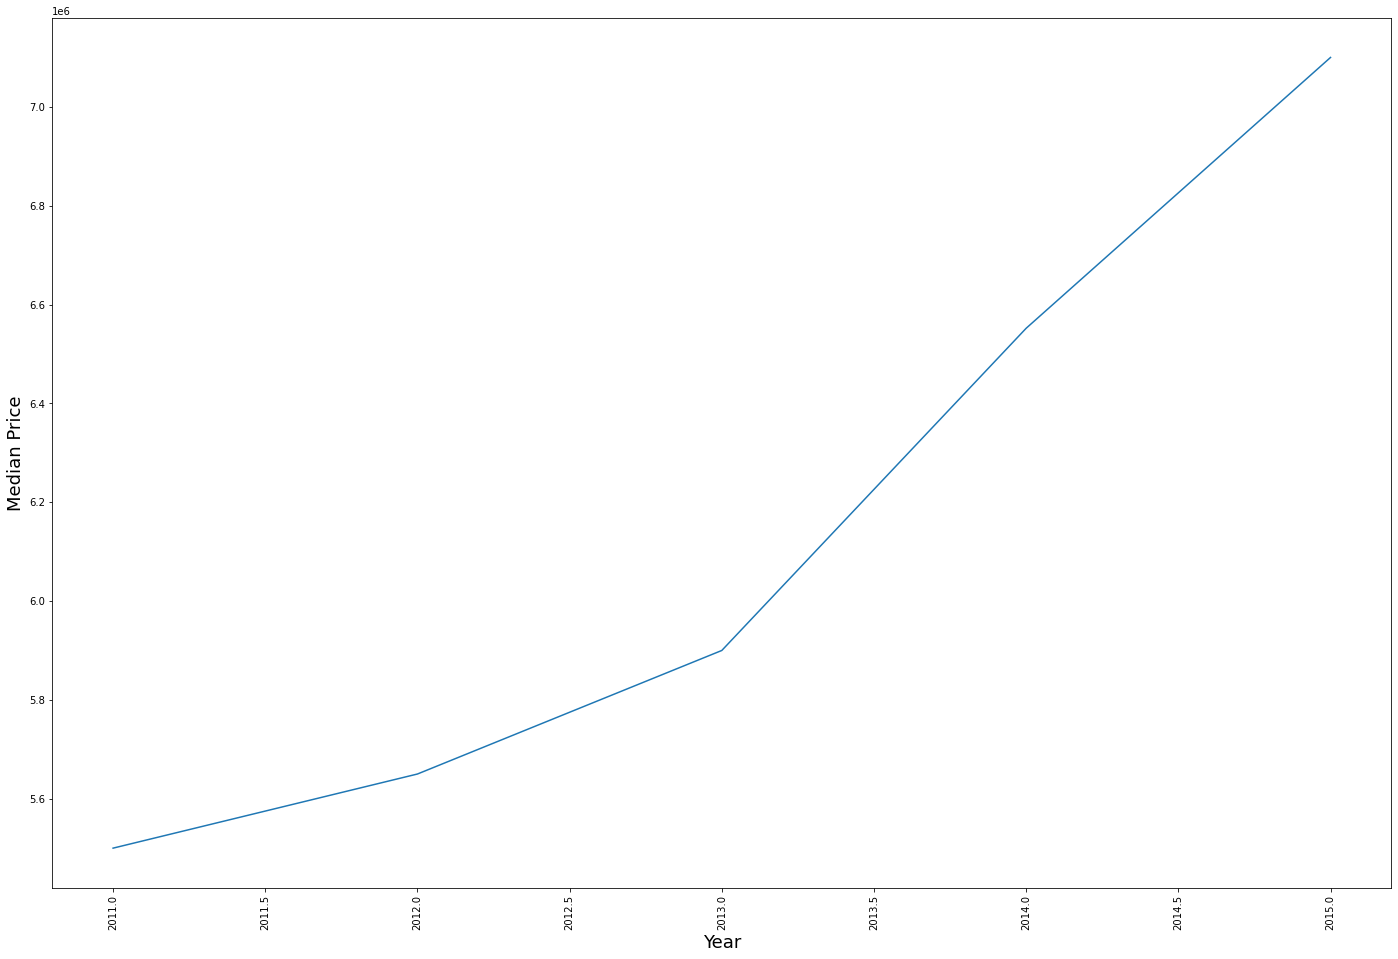

In [50]:
train_monthgrp = df.groupby('sold_year')['price_doc'].aggregate(np.median).reset_index()
plt.figure(figsize=(24, 16))
sns.lineplot(x="sold_year",y="price_doc", data=train_monthgrp)
plt.ylabel('Median Price', fontsize=18)
plt.xlabel('Year', fontsize=18)
plt.xticks(rotation='vertical')
plt.show()

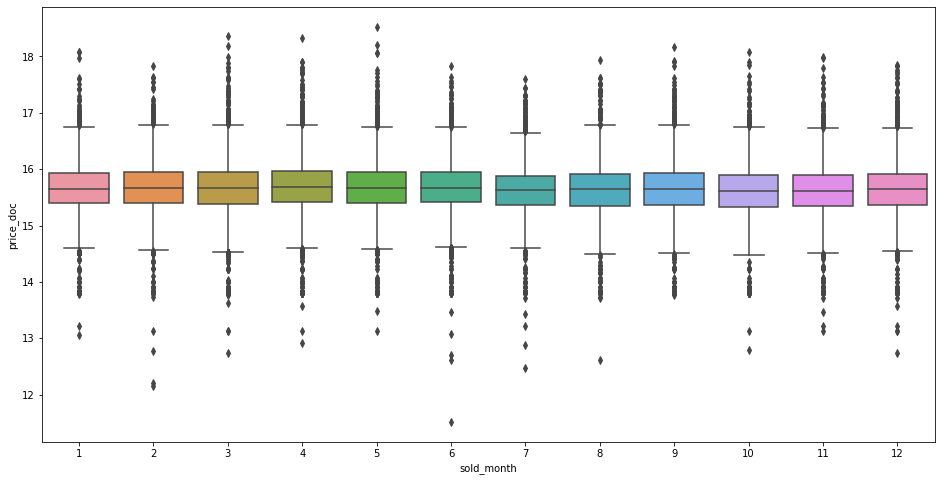

In [51]:
plt.figure(figsize=(16,8))
sns.boxplot(x = df['sold_month'], y = np.log1p(df['price_doc']), data = df[material_features])
plt.show()

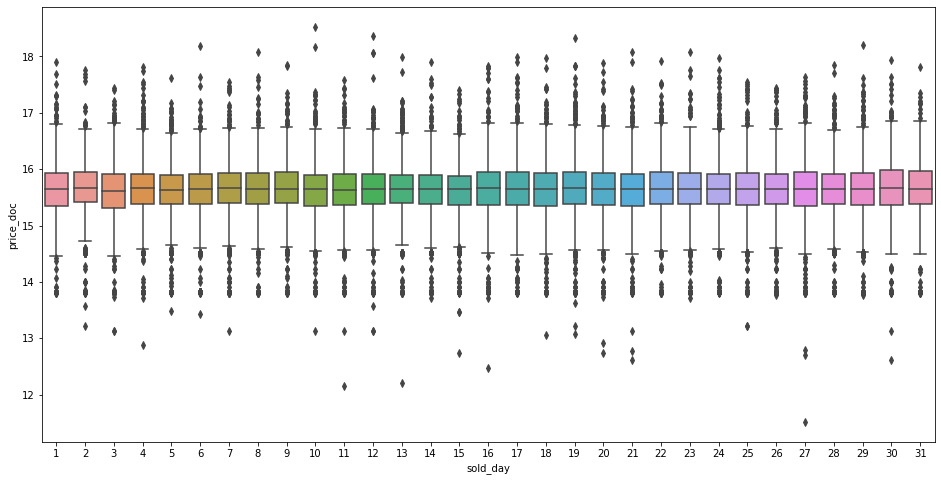

In [52]:
plt.figure(figsize=(16,8))
sns.boxplot(x = df['sold_day'], y = np.log1p(df['price_doc']), data = df[material_features])
plt.show()

## How the area is populated?
how much m by person?
how much green area by sub area?
is the green area impact positively the price of the property?

In [53]:
# how many people in m?
df['area_by_person'] = df['area_m']/df['raion_popul']

In [54]:
# get the green area in the neighborhood
df['green_area_m'] = df['green_zone_part']*df['area_m']

In [55]:
df['green_area_m']

0        1.215691e+06
1        3.573007e+06
2        5.412171e+05
3        2.450051e+06
4        1.279400e+05
             ...     
30466    9.678093e+05
30467    4.782285e+05
30468    1.267405e+07
30469    1.013541e+06
30470    2.802254e+05
Name: green_area_m, Length: 30471, dtype: float64

In [56]:
df.groupby(df['sub_area'], as_index=False)['green_zone_part'].mean()

,sub_area,green_zone_part
0,Ajeroport,0.109947
1,Akademicheskoe,0.043127
2,Alekseevskoe,0.044074
3,Altuf'evskoe,0.024333
4,Arbat,0.009851
...,...,...
141,Vyhino-Zhulebino,0.300284
142,Zamoskvorech'e,0.019885
143,Zapadnoe Degunino,0.051844
144,Zjablikovo,0.114157


In [57]:
# df.head()

In [58]:
# Mean Price by room
df['mean_price_by_room'] = df['price_doc']/df['num_room']
df['mean_price_by_room'] 

0              NaN
1              NaN
2              NaN
3              NaN
4              NaN
           ...    
30466    3700000.0
30467    6250000.0
30468    6970959.0
30469    6750000.0
30470    2800000.0
Name: mean_price_by_room, Length: 30471, dtype: float64

In [59]:
# Mean Price by number of rooms
df.groupby(df['num_room'], as_index=False)['price_doc'].mean()

,num_room,price_doc
0,0.0,7.927055e+06
1,1.0,5.330567e+06
2,2.0,7.205595e+06
3,3.0,1.026969e+07
4,4.0,1.790371e+07
5,5.0,2.045831e+07
6,6.0,2.867699e+07
7,7.0,2.550000e+07
8,8.0,3.385587e+07
9,9.0,9.512250e+07


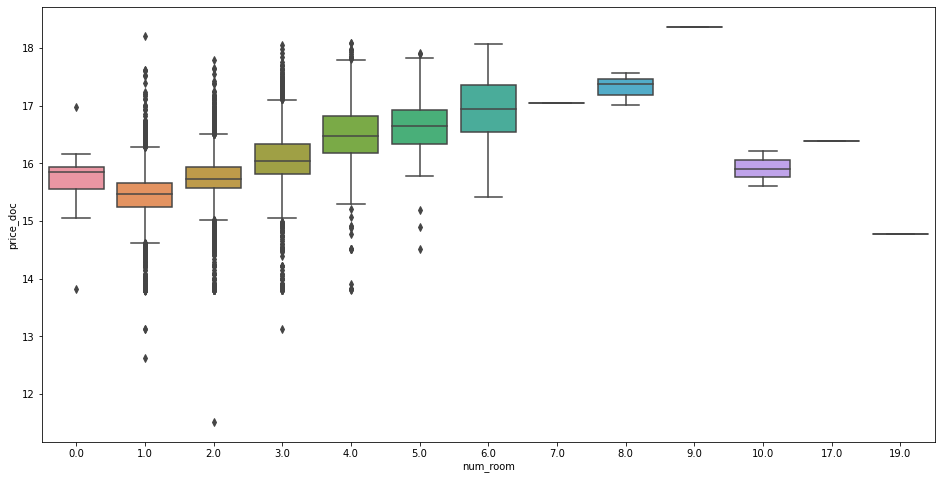

In [60]:
# Mean Price by number of rooms viz
plt.figure(figsize=(16,8))
sns.boxplot(x = df['num_room'], y = np.log1p(df['price_doc']), 
            data =df.groupby(df['num_room'], as_index=False)['price_doc'].mean())
plt.show()

In [61]:
print((df['num_room']==7).sum())
print((df['num_room']==9).sum())
print((df['num_room']==17).sum())
print((df['num_room']==19).sum())

1
1
1
1


In [62]:
df.loc[df['num_room'] == 7, 'price_doc']

18990    25500000
Name: price_doc, dtype: int64

In [63]:
df.loc[df['num_room'] == 17, 'price_doc']

26713    13150000
Name: price_doc, dtype: int64

In [64]:
df.loc[df['num_room'] == 19, 'price_doc'] #is this an outlier? a wrong entry

11621    2630000
Name: price_doc, dtype: int64

In [65]:
df.loc[df['num_room'] == 9, 'price_doc']

28326    95122496
Name: price_doc, dtype: int64

In [66]:
df.groupby(df['age_of_property'], as_index=False)['price_doc'].mean()

,age_of_property,price_doc
0,0.0,7.621333e+06
1,1.0,7.024518e+06
2,2.0,7.248245e+06
3,3.0,8.033790e+06
4,4.0,8.183312e+06
...,...,...
106,124.0,1.156352e+07
107,129.0,4.230000e+07
108,138.0,1.095000e+07
109,154.0,6.200000e+06


In [67]:
df.groupby(df['material'], as_index=False)['price_doc'].mean()

,material,price_doc
0,1.0,7.088091e+06
1,2.0,8.421237e+06
2,4.0,1.018341e+07
3,5.0,6.483122e+06
4,6.0,7.978524e+06


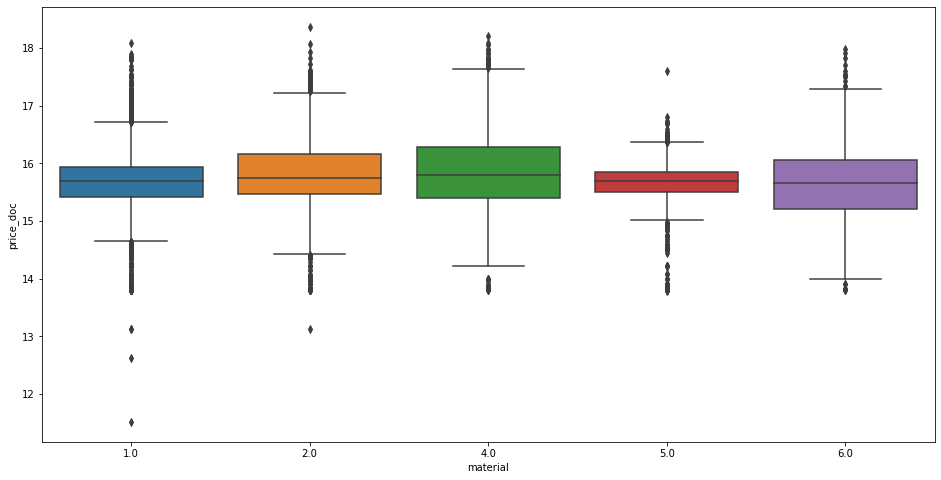

In [68]:
plt.figure(figsize=(16,8))
sns.boxplot(x = df['material'], y = np.log1p(df['price_doc']), 
            data =df.groupby(df['material'], as_index=False)['price_doc'].mean())
plt.show()

In [72]:
geo_data = pd.read_csv(r"C:\Users\SarahZOUININA\Documents\Untitled Folder\gps_sub_area_data.csv")
geo_data.head()

,no,sub_area,longitude,latitude
0,1,Babushkinskoe,55.867764,37.653413
1,2,Ljublino,55.672079,37.774135
2,3,Hovrino,55.869423,37.485376
3,4,Tverskoe,55.767249,37.605285
4,5,Jakimanka,55.732680,37.603068


In [73]:
new_df = pd.merge(df, geo_data, how="left", on=["sub_area"])

In [74]:
new_df.head()

,id,full_sq,life_sq,floor,max_floor,material,build_year,num_room,kitch_sq,state,product_type,sub_area,area_m,raion_popul,green_zone_part,indust_part,children_preschool,preschool_quota,preschool_education_centers_raion,children_school,school_quota,school_education_centers_raion,school_education_centers_top_20_raion,hospital_beds_raion,healthcare_centers_raion,university_top_20_raion,sport_objects_raion,additional_education_raion,culture_objects_top_25,culture_objects_top_25_raion,shopping_centers_raion,office_raion,thermal_power_plant_raion,incineration_raion,oil_chemistry_raion,radiation_raion,railroad_terminal_raion,big_market_raion,nuclear_reactor_raion,detention_facility_raion,full_all,male_f,female_f,young_all,young_male,young_female,work_all,work_male,work_female,ekder_all,ekder_male,ekder_female,0_6_all,0_6_male,0_6_female,7_14_all,7_14_male,7_14_female,0_17_all,0_17_male,0_17_female,16_29_all,16_29_male,16_29_female,0_13_all,0_13_male,0_13_female,raion_build_count_with_material_info,build_count_block,build_count_wood,build_count_frame,build_count_brick,build_count_monolith,build_count_panel,build_count_foam,build_count_slag,build_count_mix,raion_build_count_with_builddate_info,build_count_before_1920,build_count_1921-1945,build_count_1946-1970,build_count_1971-1995,build_count_after_1995,ID_metro,metro_min_avto,metro_km_avto,metro_min_walk,metro_km_walk,kindergarten_km,school_km,park_km,green_zone_km,industrial_km,water_treatment_km,cemetery_km,incineration_km,railroad_station_walk_km,railroad_station_walk_min,ID_railroad_station_walk,railroad_station_avto_km,railroad_station_avto_min,ID_railroad_station_avto,public_transport_station_km,public_transport_station_min_walk,water_km,water_1line,mkad_km,ttk_km,sadovoe_km,bulvar_ring_km,kremlin_km,big_road1_km,ID_big_road1,big_road1_1line,big_road2_km,ID_big_road2,railroad_km,railroad_1line,zd_vokzaly_avto_km,ID_railroad_terminal,bus_terminal_avto_km,ID_bus_terminal,oil_chemistry_km,nuclear_reactor_km,radiation_km,power_transmission_line_km,thermal_power_plant_km,ts_km,big_market_km,market_shop_km,fitness_km,swim_pool_km,ice_rink_km,stadium_km,basketball_km,hospice_morgue_km,detention_facility_km,public_healthcare_km,university_km,workplaces_km,shopping_centers_km,office_km,additional_education_km,preschool_km,big_church_km,church_synagogue_km,mosque_km,theater_km,museum_km,exhibition_km,catering_km,ecology,green_part_500,prom_part_500,office_count_500,office_sqm_500,trc_count_500,trc_sqm_500,cafe_count_500,cafe_sum_500_min_price_avg,cafe_sum_500_max_price_avg,cafe_avg_price_500,cafe_count_500_na_price,cafe_count_500_price_500,cafe_count_500_price_1000,cafe_count_500_price_1500,cafe_count_500_price_2500,cafe_count_500_price_4000,cafe_count_500_price_high,big_church_count_500,church_count_500,mosque_count_500,leisure_count_500,sport_count_500,market_count_500,green_part_1000,prom_part_1000,office_count_1000,office_sqm_1000,trc_count_1000,trc_sqm_1000,cafe_count_1000,cafe_sum_1000_min_price_avg,cafe_sum_1000_max_price_avg,cafe_avg_price_1000,cafe_count_1000_na_price,cafe_count_1000_price_500,cafe_count_1000_price_1000,cafe_count_1000_price_1500,cafe_count_1000_price_2500,cafe_count_1000_price_4000,cafe_count_1000_price_high,big_church_count_1000,church_count_1000,mosque_count_1000,leisure_count_1000,sport_count_1000,market_count_1000,green_part_1500,prom_part_1500,office_count_1500,office_sqm_1500,trc_count_1500,trc_sqm_1500,cafe_count_1500,cafe_sum_1500_min_price_avg,cafe_sum_1500_max_price_avg,cafe_avg_price_1500,cafe_count_1500_na_price,cafe_count_1500_price_500,cafe_count_1500_price_1000,cafe_count_1500_price_1500,cafe_count_1500_price_2500,cafe_count_1500_price_4000,cafe_count_1500_price_high,big_church_count_1500,church_count_1500,mosque_count_1500,leisure_count_1500,sport_count_1500,market_count_1500,green_part_2000,prom_part_2000,office_count_2000,office_sqm_2000,trc_count_2000,trc_sqm_2000,cafe_count_2000,cafe_sum_2000_min_price_avg,cafe_sum_2000_max_price_avg,cafe_avg

In [89]:
import plotly.express as px
px.set_mapbox_access_token("pk.eyJ1Ijoic3pvdWluaW5hIiwiYSI6ImNrcG5yamtuczAwdWwyd3F4dWE2MmdnenQifQ.TFnyw6ML07BqpjcTXmFCwQ")

fig = px.scatter_mapbox(new_df, lon="latitude", lat="longitude", size="price_doc",
                  color_continuous_scale=px.colors.cyclical.IceFire, size_max=15, zoom=10)
fig.show()